In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn-colorblind')

In [4]:
dat=pd.read_excel('C:/YellowBelt/Отбраковка на БМ.xlsx')

In [5]:
dat

,Причины,тонны
0,Пятна,80.310
1,Пятна,10.000
2,Пыль,0.000
3,Дыры,9.515
4,Масло,4.226
5,Грязь,1.300
6,Маркировка_1,0.400
7,Маркировка_2,5.310
8,Маркировка_3,0.500
9,Полосы,0.000


In [6]:
def pareto_chart(dat,category:str,values:str,title=None,percent_to_combne=None):
    
    """ 
    Функция для построение диаграммы Парето. Она получает таблицу состоящую из двух столбцов:
        категорийных переменных и их значений. На основании этой таблицы функция строит диаграмму Паерто.
    dat - Таблица данных
    category - имя категорийной переменной (str)
    values - значения категорийных переменных (float)
    """
    dat=dat.groupby(by=category).sum() # Grouping DataFrame by category and summation 
    dat=dat.sort_values(by=values,ascending=False) # Sorting by values in descending order
    dat['%']=np.round(dat[values]/dat[values].sum()*100,2) # Adding percents to DataFrame
    dat['накопит_%']=dat['%'].cumsum()                   # Adding cumulative percent to DataFrame
    dat.reset_index(inplace=True)                               # Reseting index
    # Combing categories after which is less then (1-percent_to_combine)
    if percent_to_combne is not None:
        for i in range(dat.shape[0]):
            if dat.iloc[i]['накопит_%']>=percent_to_combne:
                dat.at[i,category]='Другие'
        
        dat_other=dat[dat[category]=='Другие']
        dat_other=dat_other.groupby(category).sum()
        dat_other.reset_index(inplace=True)
        dat_other['накопит_%']=100
        dat=dat[dat[category]!='Другие']
        dat=pd.concat([dat,dat_other])
    dat.set_index(category,inplace=True)    
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    dat[values].plot(kind='bar',ax=ax)
    ax.set_ylabel(values)
    ax2=ax.twinx()
    dat['накопит_%'].plot(kind='line',color='red',ax=ax2)
    ax2.set_ylabel('%')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()

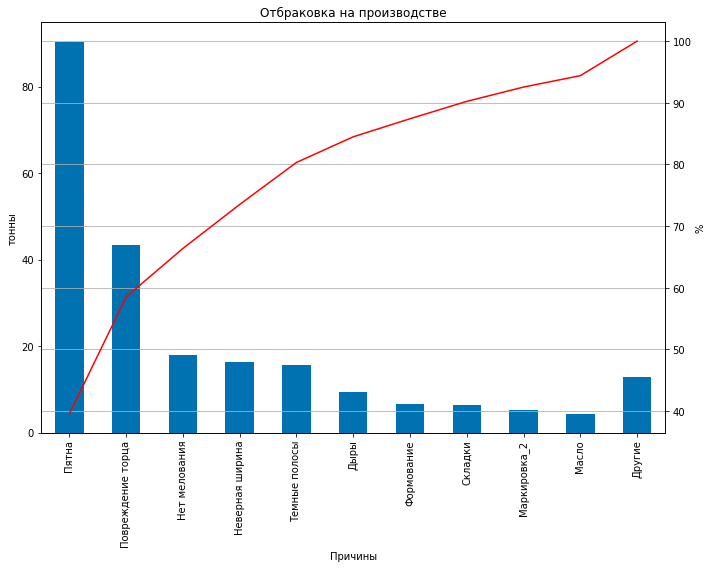

In [7]:
pareto_chart(dat,category='Причины',values='тонны',title='Отбраковка на производстве',percent_to_combne=95)

In [8]:
dat_2=pd.read_excel('C:/YellowBelt/Отбраковка_2020.xlsx')

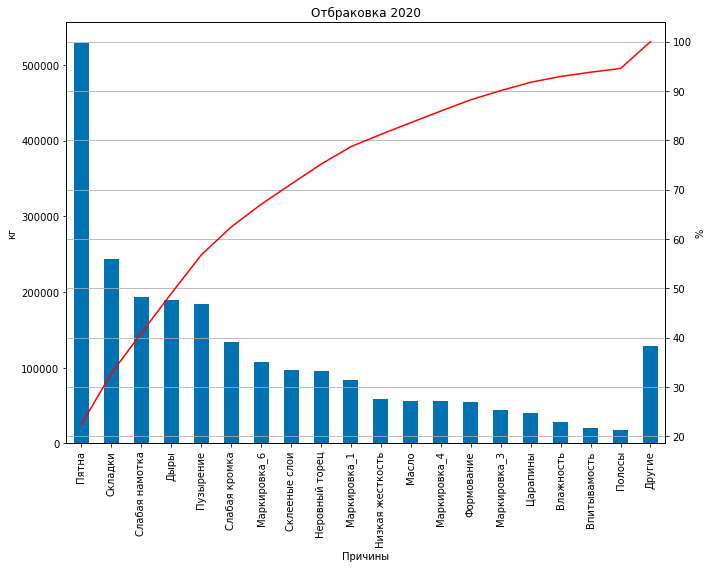

In [9]:
pareto_chart(dat_2,category='Причины',values='кг',title='Отбраковка 2020',percent_to_combne=95)

In [10]:
dat_2['тонны']=dat_2['кг']/1000

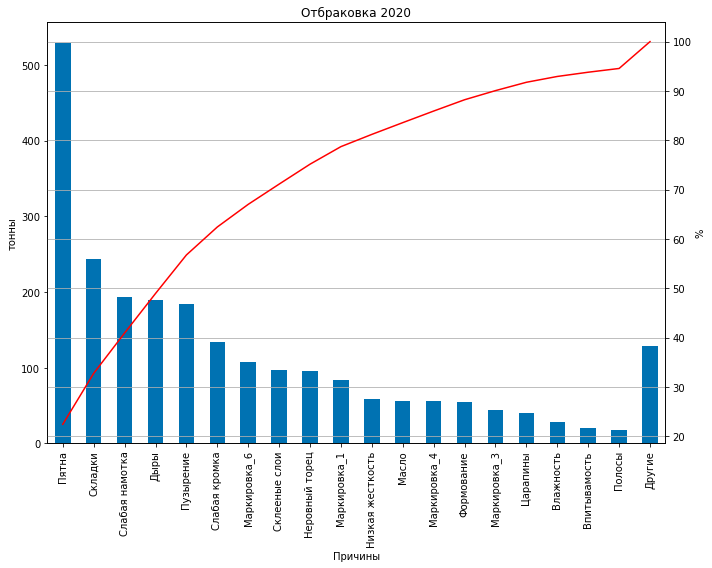

In [11]:
pareto_chart(dat_2,category='Причины',values='тонны',title='Отбраковка 2020',percent_to_combne=95)